In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif, SelectKBest

df = pd.read_csv('data/water_potability.csv')
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [190]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [191]:
print(df.isna().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [192]:
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace = True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace = True)
df['ph'].fillna(df['ph'].mean(), inplace = True)
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


C:\Users\franc\AppData\Local\Temp\ipykernel_23284\3423219204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sulfate'].fillna(df['Sulfate'].mean(), inplace = True)
C:\Users\franc\AppData\Local\Temp\ipykernel_23284\3423219204.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [193]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.080795,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [194]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


### Separamos caracteristicas y obejivo

In [195]:

X_imputed = df.drop('Potability', axis=1)
y = df['Potability']

## Distribución

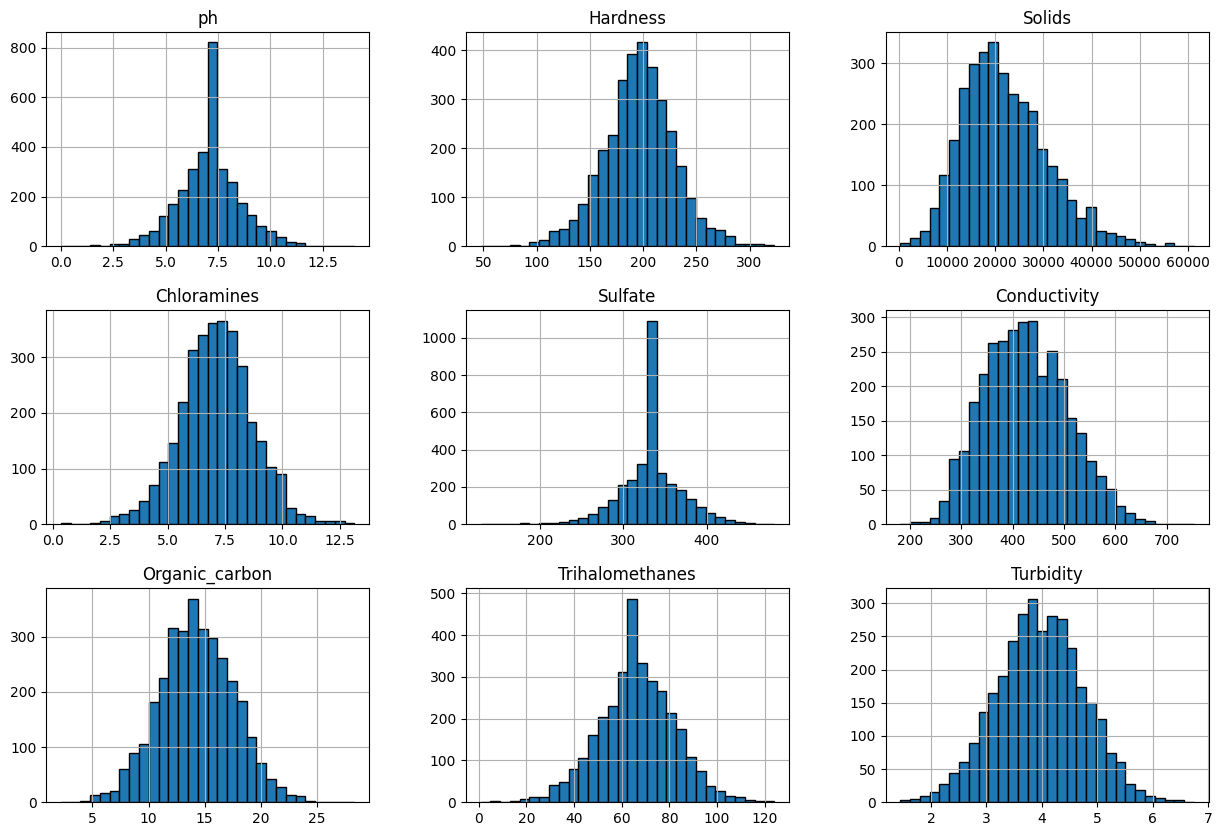

In [196]:
X = df.drop('Potability', axis = 1)
y = df['Potability']
X.hist(bins=30, figsize=(15, 10), layout=(3, 3), edgecolor='black')
plt.show()

## Transofromamos y normalizamos

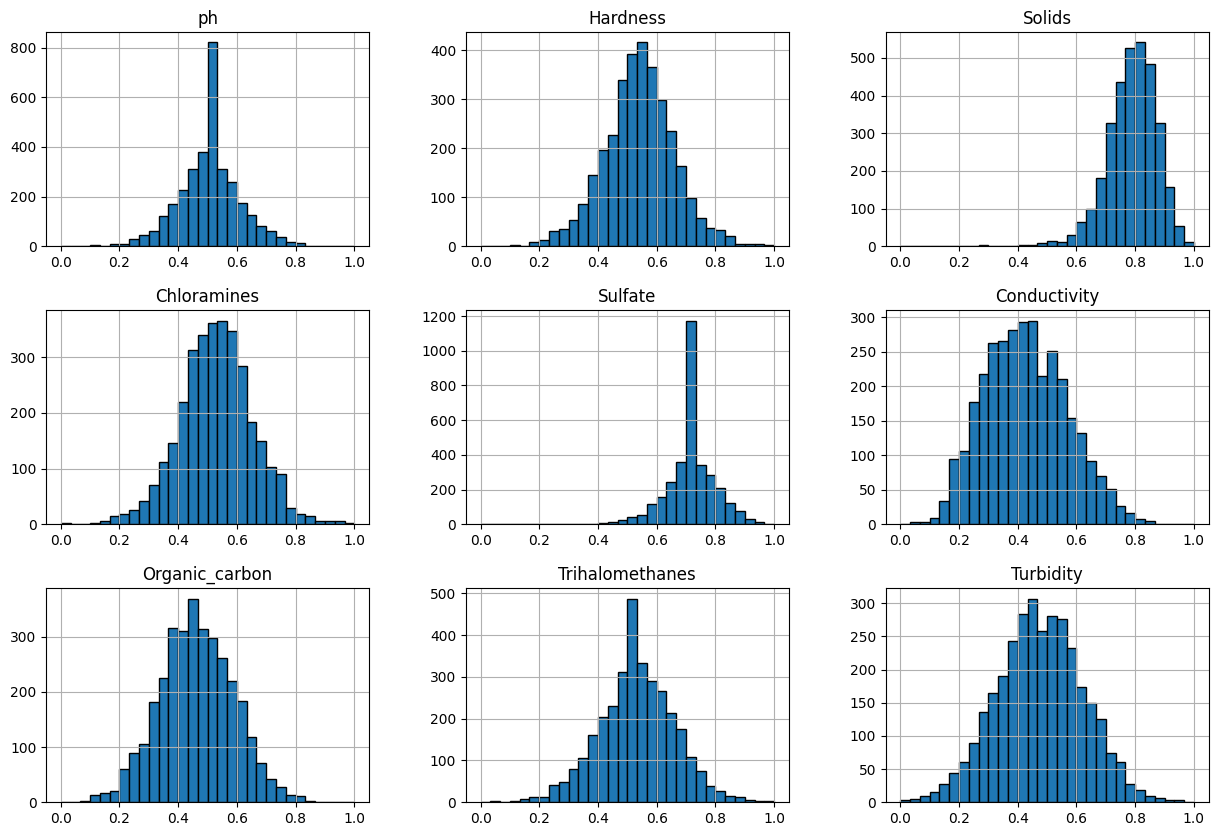

In [197]:
from sklearn.preprocessing import MinMaxScaler


X_transformed = X.copy()
X_transformed['Solids'] = np.log1p(X_transformed['Solids'])
X_transformed['Sulfate'] = np.log1p(X_transformed['Sulfate'])

scaler = MinMaxScaler()
X_normalized_array  = scaler.fit_transform(X_transformed)
X_normalized= pd.DataFrame(X_normalized_array, columns = X.columns )
X_normalized.hist(bins=30, figsize=(15, 10), layout=(3, 3), edgecolor='black')


plt.show()

## Selección de caracteristicas

Preparando datos para el filtro (imputando nulos con KNNImputer)...
Valores nulos imputados para la selección.

Calculando Correlación de Spearman contra 'Potability'...

--- Resultados del Análisis (Correlación de Spearman) ---
                  Característica  Correlacion  Correlacion_Absoluta
Organic_carbon    Organic_carbon    -0.026774              0.026774
Solids                    Solids     0.026234              0.026234
Chloramines          Chloramines     0.024980              0.024980
Sulfate                  Sulfate    -0.012522              0.012522
Hardness                Hardness    -0.010606              0.010606
Conductivity        Conductivity    -0.010386              0.010386
Trihalomethanes  Trihalomethanes     0.005561              0.005561
ph                            ph    -0.003700              0.003700
Turbidity              Turbidity     0.001088              0.001088

ACCIÓN: Características seleccionadas (Correlación Absoluta > 0.003):
['Organic_carbon', '

C:\Users\franc\AppData\Local\Temp\ipykernel_23284\651197825.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlacion', y='Característica', data=results_df, palette='coolwarm')


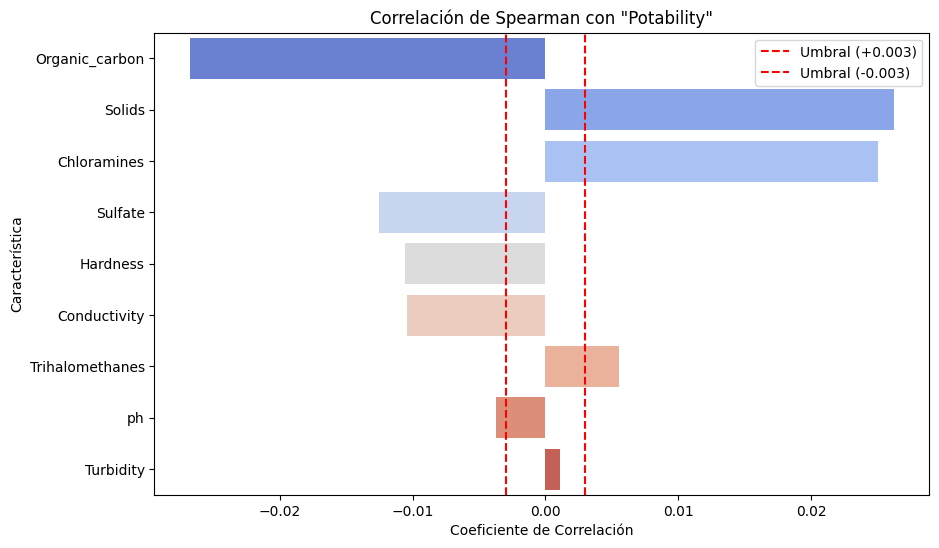

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer


X = df.drop('Potability', axis=1)
y = df['Potability']
feature_names = X.columns

# Usamos KNNImputer 
imputer = KNNImputer(n_neighbors=5)
X_imputed_array = imputer.fit_transform(X)

X_imputed_df = pd.DataFrame(X_imputed_array, columns=feature_names)
X_imputed_df['Potability'] = y.values

print("Valores nulos imputados para la selección.")

print("\nCalculando Correlación de Spearman contra 'Potability'...")

corr_matrix = X_imputed_df.corr(method='spearman')
corr_target = corr_matrix['Potability'].drop('Potability') 

results_df = pd.DataFrame({
    'Característica': corr_target.index,
    'Correlacion': corr_target,
    'Correlacion_Absoluta': corr_target.abs()
})
results_df = results_df.sort_values(by='Correlacion_Absoluta', ascending=False)

print("\n--- Resultados del Análisis (Correlación de Spearman) ---")
print(results_df.to_string())

umbral_score = 0.003 

features_to_keep = results_df[results_df['Correlacion_Absoluta'] > umbral_score]['Característica'].tolist()
features_to_drop = results_df[results_df['Correlacion_Absoluta'] <= umbral_score]['Característica'].tolist()

print(f"\nACCIÓN: Características seleccionadas (Correlación Absoluta > {umbral_score}):")
print(features_to_keep)


plt.figure(figsize=(10, 6))
sns.barplot(x='Correlacion', y='Característica', data=results_df, palette='coolwarm')
plt.title('Correlación de Spearman con "Potability"')
plt.xlabel('Coeficiente de Correlación')

plt.axvline(x=umbral_score, color='red', linestyle='--', label=f'Umbral (+{umbral_score})')
plt.axvline(x=-umbral_score, color='red', linestyle='--', label=f'Umbral (-{umbral_score})')
plt.legend()
plt.show()


In [199]:
features_to_keep = results_df['Característica'].tolist()
print(f"Características Seleccionadas (k=6): {features_to_keep}")

Características Seleccionadas (k=6): ['Organic_carbon', 'Solids', 'Chloramines', 'Sulfate', 'Hardness', 'Conductivity', 'Trihalomethanes', 'ph', 'Turbidity']


In [200]:
X = df.drop('Potability', axis = 1)
X = X[features_to_keep]
y = df['Potability']

## Entrenamiento

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
counts = y_train.value_counts()
counts

Potability
0    1586
1    1034
Name: count, dtype: int64

In [203]:
scale_pos_weight_val = counts[0] / counts[1]

In [204]:
model = CatBoostClassifier(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        eval_metric='Accuracy',
        random_seed=42,
        scale_pos_weight=scale_pos_weight_val,
        verbose=100
    ) 

In [205]:
model.fit(
        X_train, y_train,
        eval_set=(X_test, y_test),
        early_stopping_rounds=50
    )

0:	learn: 0.5941178	test: 0.5503572	best: 0.5503572 (0)	total: 2.58ms	remaining: 1.29s
100:	learn: 0.7997694	test: 0.6568675	best: 0.6640779 (77)	total: 236ms	remaining: 931ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6640778756
bestIteration = 77

Shrink model to first 78 iterations.


In [206]:
print("\n--- Evaluación del Modelo ---")
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy): {accuracy * 100:.2f}%")
print("\nReporte de Clasificación:")
mc = confusion_matrix(y_test,y_pred)
print(mc)
print(classification_report(y_test, y_pred))


--- Evaluación del Modelo ---
Precisión (Accuracy): 68.45%

Reporte de Clasificación:
[[312 100]
 [107 137]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       412
           1       0.58      0.56      0.57       244

    accuracy                           0.68       656
   macro avg       0.66      0.66      0.66       656
weighted avg       0.68      0.68      0.68       656

